# K-Nearest Neighbor (KNN) for Wine Classification

## Project Topic

The goal of this project is to create a model with `K-Nearest Neighbor(KNN)` for `wine classification`. The model will classify `red wine` and `white wine`. I used the dataset 'Wine Quality Data Set' from https://archive.ics.uci.edu/ml/datasets/Wine+Quality.  

## About Data

The response variable is `class of wines` (0: red wine, 1: white wine), which I added to the original data. The predictor variables are vatiables from the dataset below:

### variables from the dataset

The variable `quality` is sensory data. The others are data collected by physicochemical tests.

1. fixed acidity
1. volatile acidity
1. citric acid
1. residual sugar
1. chlorides
1. free sulfur dioxide
1. total sulfur dioxide
1. density
1. pH
1. sulphates
1. alcohol
1. quality (sensory data, score between 0 and 10)

For more information: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

### size of the dataset
Both wines have the same size of the dataset.

- red wine: 1599
- white wine: 4898

## Installing Libraries

I used these libraries. The installation command is below:
```
pip install pandas sklearn matplotlib
```

In [ ]:
import pandas as pd
import requests
import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Importing Data

First, we import data from the source. We added the column `type` as the class of wines (0: red, 1: white). Checking the data size is also done here.

In [47]:
# data columns
columns = [
    'fixedacidity',
    'volatileacidity',
    'citricacid',
    'residualsugar',
    'chlorides',
    'freesulfurdioxide',
    'totalsulfurdioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality',
    'type'
]

def read_data_from_url(url):
    res = requests.get(url).content
    return pd.read_csv(io.StringIO(res.decode('utf-8')), header=None, skiprows=1, delimiter=";")

# red wine data
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_red = read_data_from_url(red_url)
data_red['type'] = [0] * data_red.shape[0]
data_red.columns = columns

# white wine data
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data_white = read_data_from_url(white_url)
data_white['type'] = [1] * data_white.shape[0]
data_white.columns = columns

# checking data 
print('the shape of red wine data: {}'.format(data_red.shape))
print(data_red.head())
print('the shape of white wine data: {}'.format(data_white.shape))
print(data_white.head())

# concat
data = pd.concat([data_red, data_white])
print('the shape of combined data: {}'.format(data.shape))

the shape of red wine data: (1599, 13)
   fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0           7.4             0.70        0.00            1.9      0.076   
1           7.8             0.88        0.00            2.6      0.098   
2           7.8             0.76        0.04            2.3      0.092   
3          11.2             0.28        0.56            1.9      0.075   
4           7.4             0.70        0.00            1.9      0.076   

   freesulfurdioxide  totalsulfurdioxide  density    pH  sulphates  alcohol  \
0               11.0                34.0   0.9978  3.51       0.56      9.4   
1               25.0                67.0   0.9968  3.20       0.68      9.8   
2               15.0                54.0   0.9970  3.26       0.65      9.8   
3               17.0                60.0   0.9980  3.16       0.58      9.8   
4               11.0                34.0   0.9978  3.51       0.56      9.4   

   quality  type  
0        5     0  
1  

## Describing and Cleansing Data

Here, we describe the data and check the format (e.g. NaN, N/A).

In [29]:
# check isna
print(data.isna().sum())

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
type                  0
dtype: int64


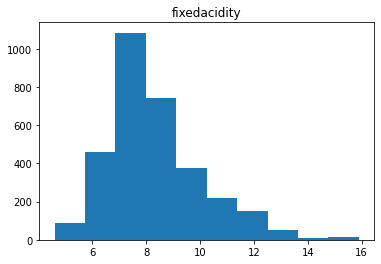

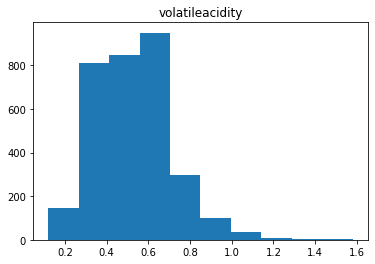

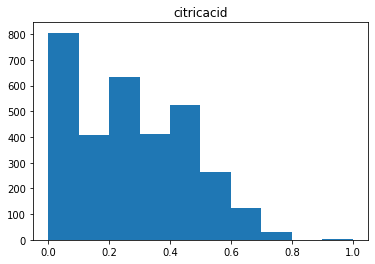

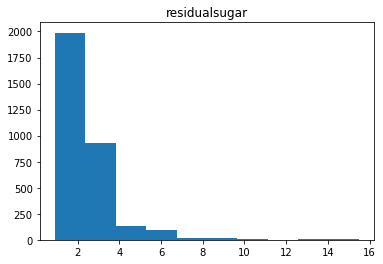

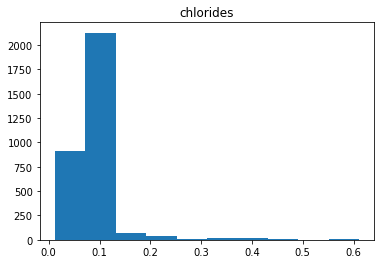

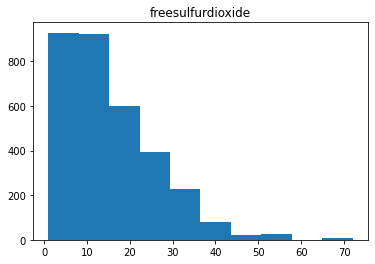

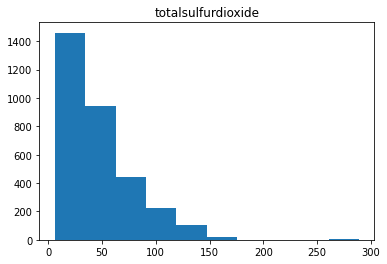

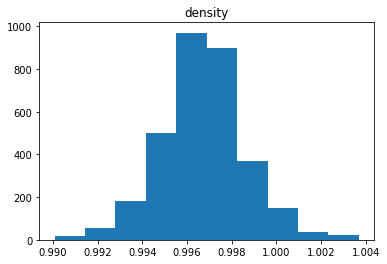

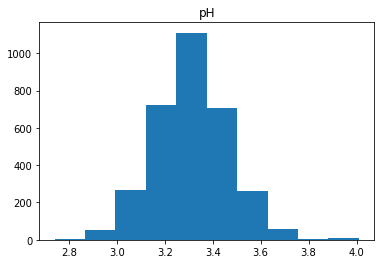

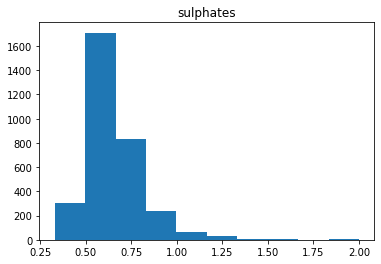

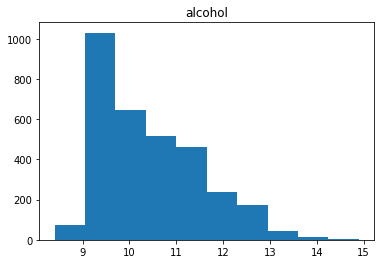

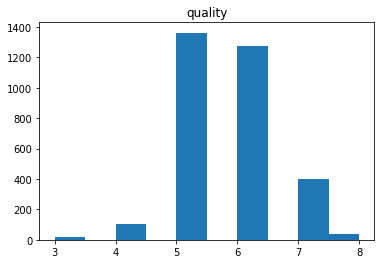

In [34]:
# show histgrams
variables = columns[:]
variables.remove('type')
for v in variables:
    d = data[v]
    plt.hist(d)
    plt.title(v)
    plt.show()

## Spliting Data for Train and Test

We split the data for train and test. The ratio is below:

- train: 70%
- test: 30%

In [41]:
# response variable
response = 'type'
y = data[response]

# predictor variables
predictors = columns[:]
predictors.remove(response)
X = data[predictors]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check
print('the shape of X train: {}'.format(X_train.shape))
print('the shape of y train: {}'.format(y_train.shape))
print('the shape of X test: {}'.format(X_test.shape))
print('the shape of y test: {}'.format(y_test.shape))

the shape of X train: (2238, 12)
the shape of y train: (2238,)
the shape of X test: (960, 12)
the shape of y test: (960,)


## Creating Models



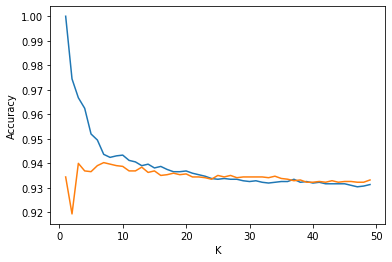

In [48]:
training_acc = []
test_acc = []
k_max = 50

# create models
r = range(1, k_max)
for k in range(1, k_max):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    training_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(r, training_accuracy, label='Training')
plt.plot(r, test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()

## Model Analysis

As we can see from the graph above, the best model is around K=7. Just extract the best accuracy by test data and fix the best model.

In [53]:
m = max(test_accuracy)
best_k = test_accuracy.index(m) + 1

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

print("Best Model: K={}".format(best_k))
print("Accuracy of the best model by train data: {}".format(model.score(X_train, y_train)))
print("Accuracy of the best model by test data: {}".format(model.score(X_test, y_test)))

Best Model: K=7
Accuracy of the best model by train data: 0.9436576354679803
Accuracy of the best model by train data: 0.9402893197907048


## Conclusion

We train the KNN model with the wine data. As we can see, the best model is K=7 and its accuracy is about 0.940 for test data.